In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("HD_processed.csv")
df.info()
print(df.shape)
pd.set_option("display.max_rows", None, "display.max_columns", None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35144 entries, 0 to 35143
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unique_ID                                          35144 non-null  int64  
 1   Invoice_Date                                       35144 non-null  object 
 2   Customer_Id                                        35144 non-null  int64  
 3   Warehouse                                          35144 non-null  object 
 4   Postal_Code                                        35144 non-null  int64  
 5   Customer_MarketSegment_Id                          35144 non-null  object 
 6   Sales_Order_Id                                     35144 non-null  object 
 7   Created_Date                                       35144 non-null  object 
 8   Job_Description                                    35144 non-null  object 
 9   Source

In [2]:
df = df.drop('Unique_ID', 1)
df = df.drop('Invoice_Date', 1)
df = df.drop('Customer_Id', 1)
df = df.drop('Warehouse', 1)
df = df.drop('Postal_Code', 1)
df = df.drop('Sales_Order_Id', 1)
df = df.drop('Created_Date', 1)
df = df.drop('Job_Description', 1)
df = df.drop('Real_Invoice_Date', 1)
df = df.drop('Quarter', 1)
df = df.drop('BigCustomer', 1)
df = df.drop('Distance_to_Toowoomba(km)', 1)
df = df.drop('Monthly_rainfall(mm)', 1)
df = df.drop('Value_building_jobs(private_sector_AUD_thousands)', 1)
df['Month'] = df['Month'].astype("object")
df.info()

C:\Users\mib67\AppData\Local\Temp/ipykernel_15316/601186720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unique_ID', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_15316/601186720.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Invoice_Date', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_15316/601186720.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Customer_Id', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_15316/601186720.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Warehouse', 1)
C:\Users\mib67\AppData\Local\Temp/ipykernel_15316/601186720.py:5: FutureWarning: In

<AxesSubplot:>

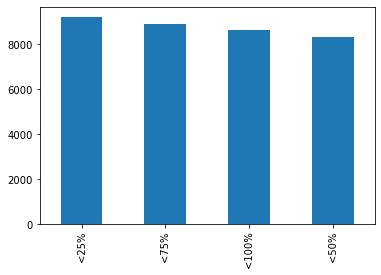

In [4]:
#balanced label column
df["Quantile_transactions"].value_counts().plot(kind="bar")

In [5]:
df_dum = pd.get_dummies(df, columns = ['Customer_MarketSegment_Id', 'Source_Of_Supplier_Id', 'Major_Minor_Class', 'Sales_Channel', 'Month'])
print(df_dum.shape)

(35144, 201)


In [6]:
Y = df_dum["Quantile_transactions"]
X = df_dum.drop('Quantile_transactions', 1)
print(Y.shape)
print(X.shape)

(35144,)
(35144, 200)


C:\Users\mib67\AppData\Local\Temp/ipykernel_15316/1952956261.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_dum.drop('Quantile_transactions', 1)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_other, Y_train, Y_other = train_test_split(X, Y, test_size=0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_other, Y_other, test_size=0.5, random_state = 42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(24600, 200)
(5272, 200)
(5272, 200)
(24600,)
(5272,)
(5272,)


(24600, 200)
(5272, 200)
(5272, 200)


Text(0.5, 1.0, 'X_train_standard')

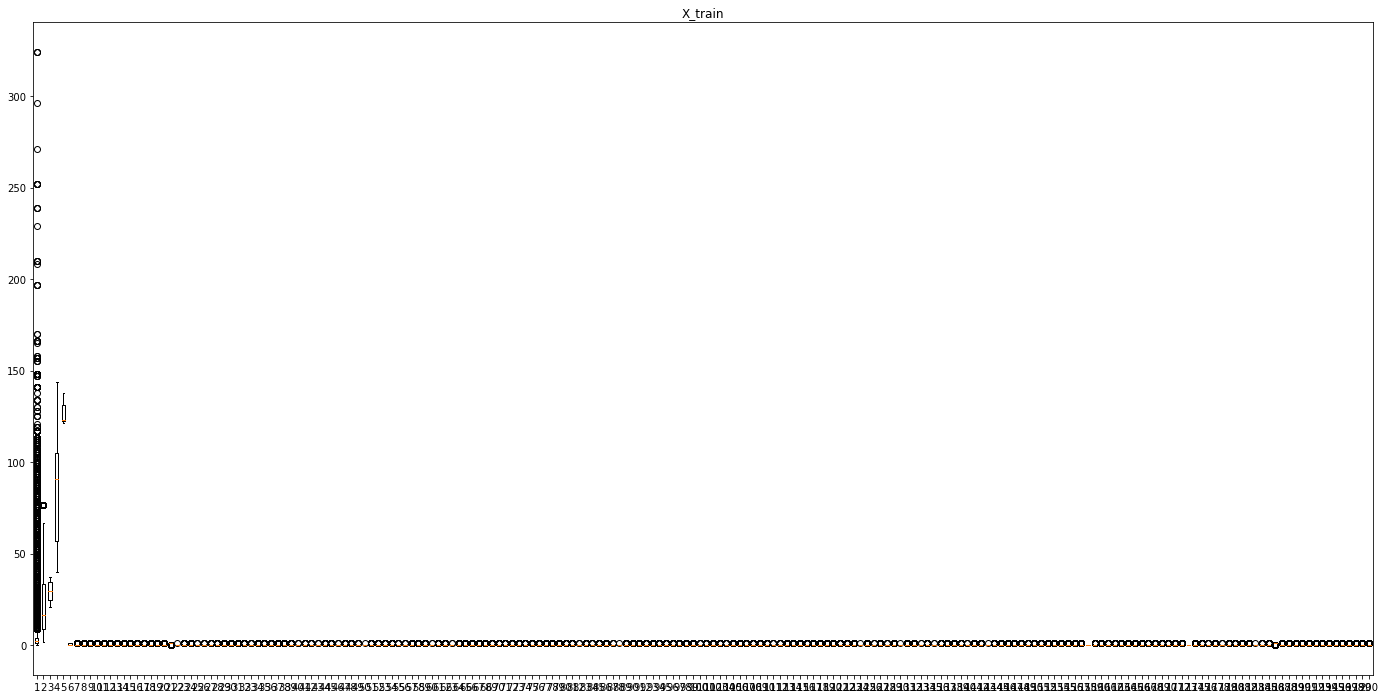

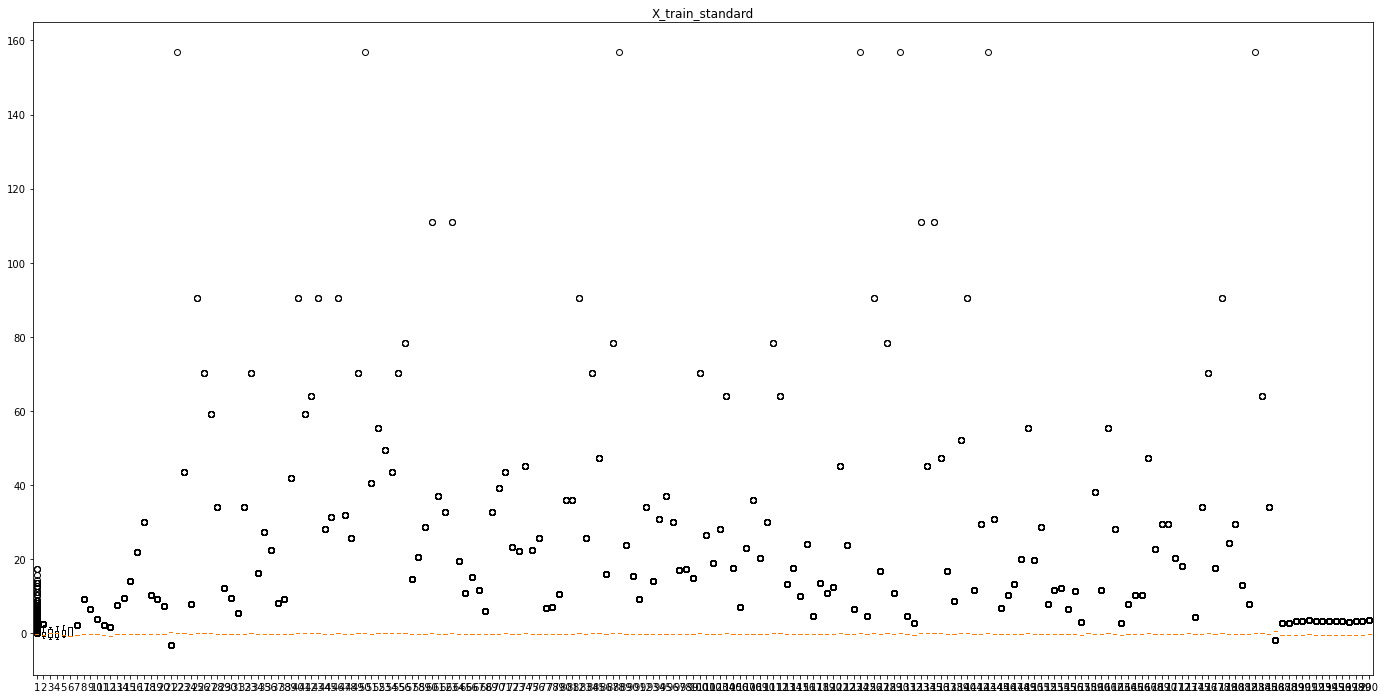

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_val_standard = scaler.fit_transform(X_val)
X_test_standard = scaler.fit_transform(X_test)
print(X_train_standard.shape)
print(X_val_standard.shape)
print(X_test_standard.shape)

fig = plt.figure(figsize = [24, 12])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train)
ax.set_title("X_train")

fig = plt.figure(figsize = [24, 12])
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(X_train_standard)
ax.set_title("X_train_standard")

              precision    recall  f1-score   support

       <100%       0.53      0.57      0.55      1286
        <25%       0.55      0.61      0.58      1352
        <50%       0.59      0.51      0.55      1290
        <75%       0.59      0.56      0.57      1344

    accuracy                           0.56      5272
   macro avg       0.57      0.56      0.56      5272
weighted avg       0.57      0.56      0.56      5272



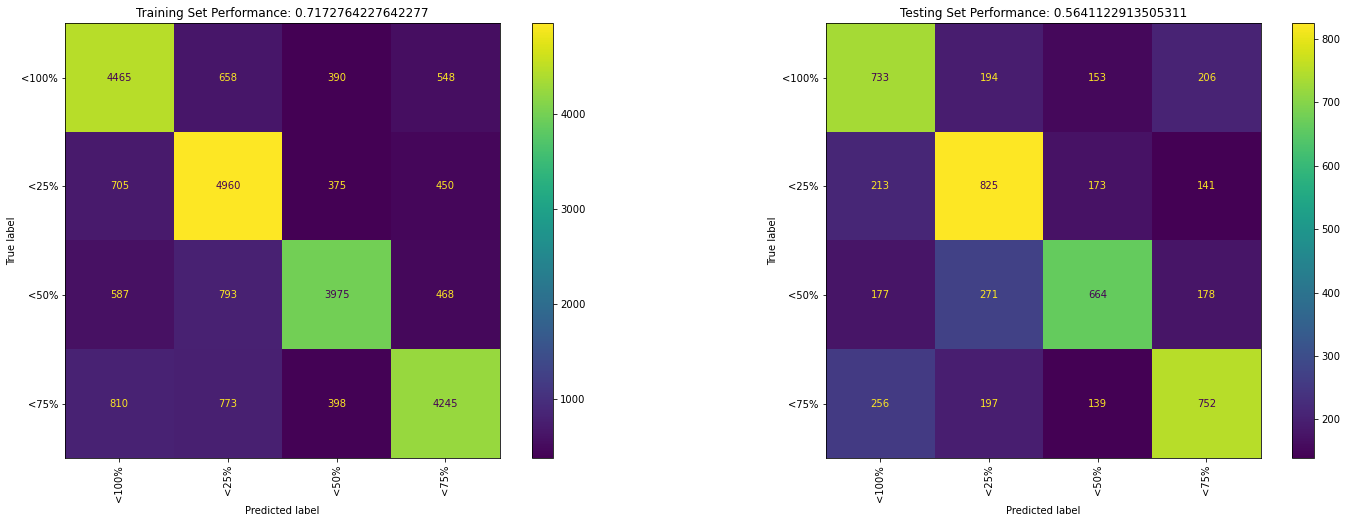

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

rf = RandomForestClassifier(n_estimators=78, max_depth=22, class_weight="balanced",random_state=42, n_jobs = -1).fit(X_train_standard, Y_train)

print(classification_report(Y_test, rf.predict(X_test_standard)));
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(Y_test, model.predict(X_test_standard))
print("Balanced_accuracy(test): ", balanced_accuracy)

fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
conf = ConfusionMatrixDisplay.from_estimator(rf, X_train_standard, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
pred = rf.predict(X_train_standard)
conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
ax = fig.add_subplot(1, 2, 2)
conf = ConfusionMatrixDisplay.from_estimator(rf, X_test_standard, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
pred = rf.predict(X_test_standard)
conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

best hyper-parameters: {'class_weight': 'balanced', 'max_depth': 22, 'n_estimators': 78}
validation accuracy: 0.5339565004887585
              precision    recall  f1-score   support

       <100%       0.46      0.49      0.48      1286
        <25%       0.52      0.57      0.54      1352
        <50%       0.56      0.46      0.50      1290
        <75%       0.51      0.51      0.51      1344

    accuracy                           0.51      5272
   macro avg       0.51      0.51      0.51      5272
weighted avg       0.51      0.51      0.51      5272

Time spent:   3397.531250 seconds


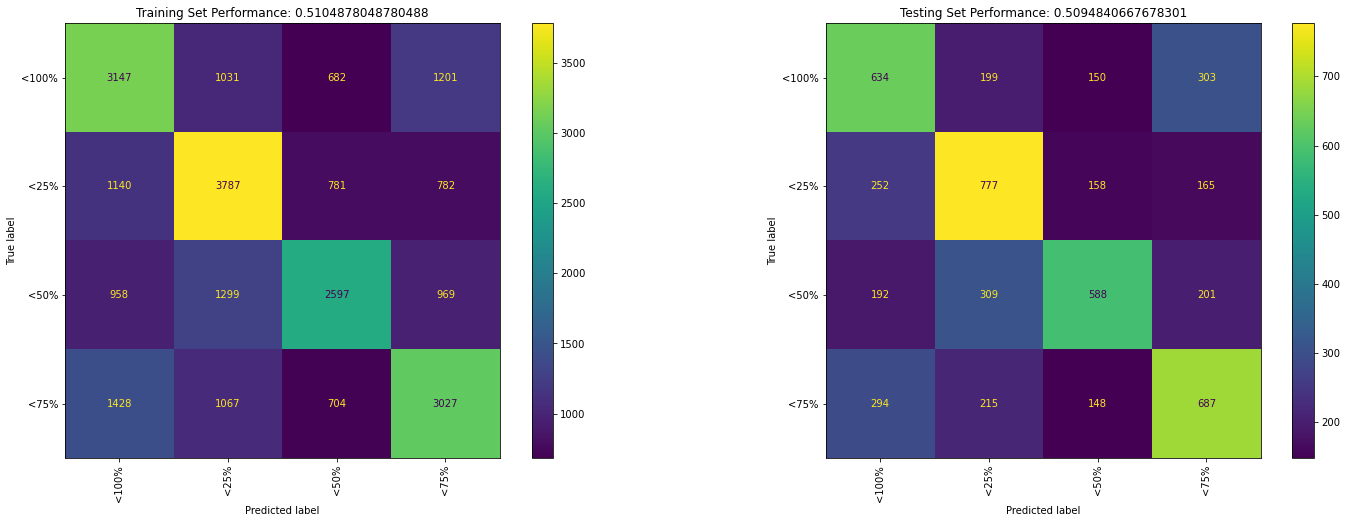

In [25]:
from sklearn.model_selection import GridSearchCV
from time import process_time

time_start = process_time()

parameter = {'n_estimators' : list(range(40,80)), 'max_depth' : list(range(10,30)), 'class_weight' : ['balanced', 'balanced_subsample']}
grid_rf = GridSearchCV(rf, parameter, cv = 10, n_jobs=-1)
grid_rf.fit(X_val_standard, Y_val)
grid_rf.cv_results_
print("best hyper-parameters: " + str(grid_rf.best_params_))
print("validation accuracy: " + str(grid_rf.best_score_))
print(classification_report(Y_test, grid_rf.predict(X_test_standard)));

fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
conf = ConfusionMatrixDisplay.from_estimator(grid_rf, X_train_standard, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
pred = grid_rf.predict(X_train_standard)
conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
ax = fig.add_subplot(1, 2, 2)
conf = ConfusionMatrixDisplay.from_estimator(grid_rf, X_test_standard, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
pred = grid_rf.predict(X_test_standard)
conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

time_end = process_time()
print('Time spent:   %f seconds' % (time_end - time_start))

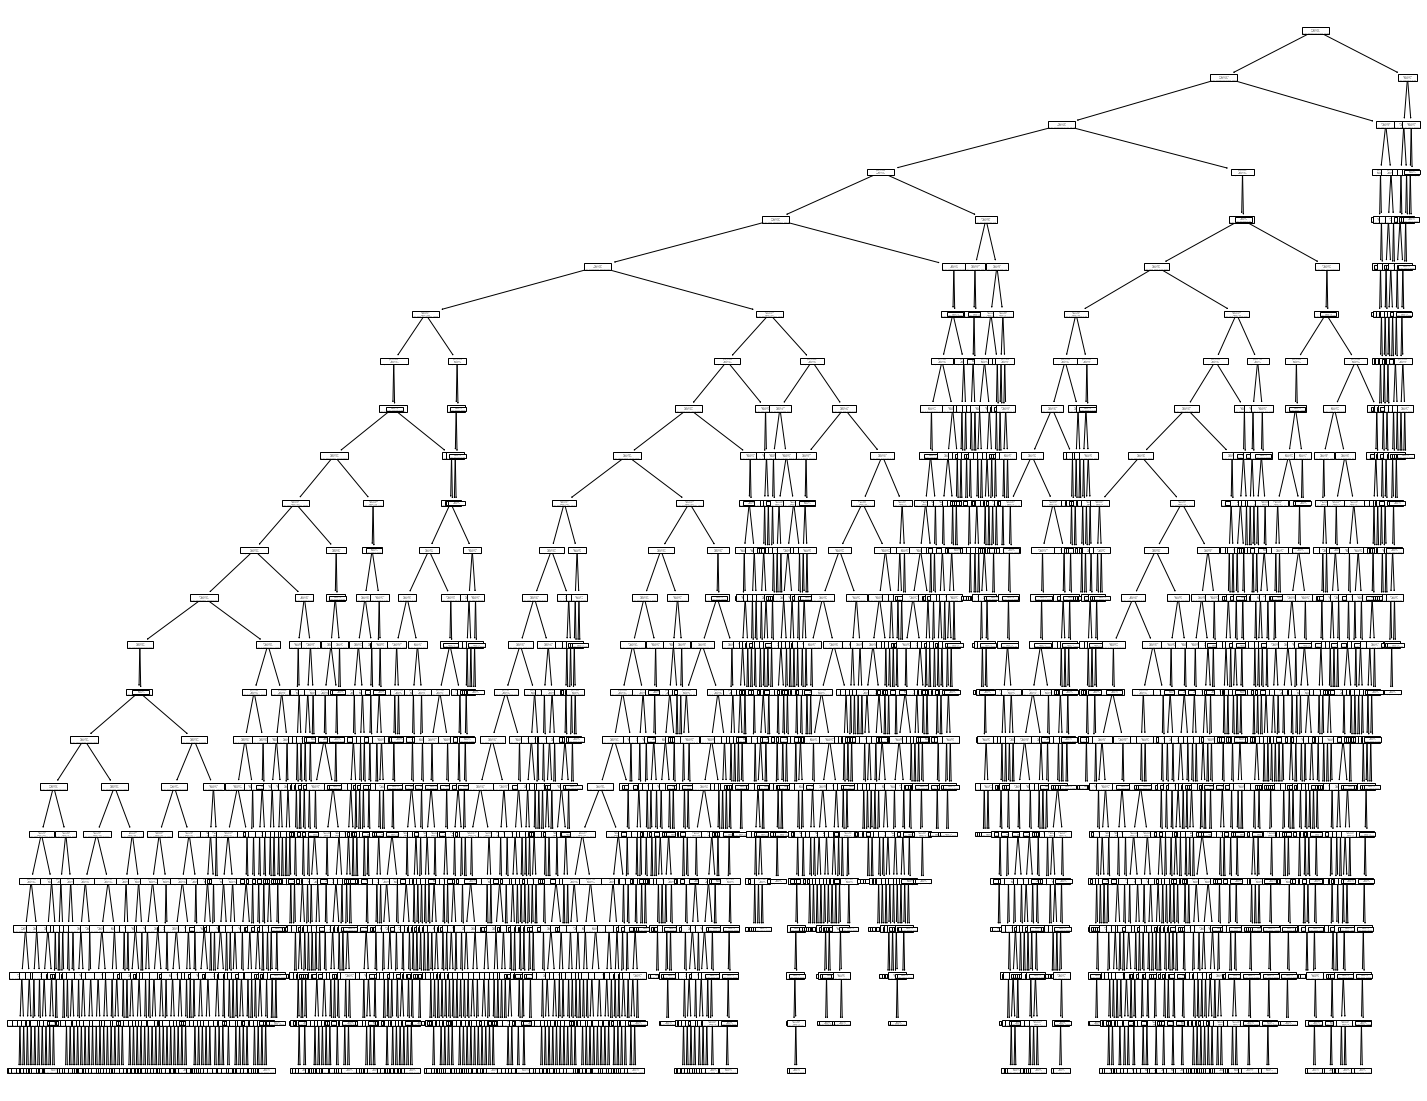

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf.estimators_[0]) 

<AxesSubplot:>

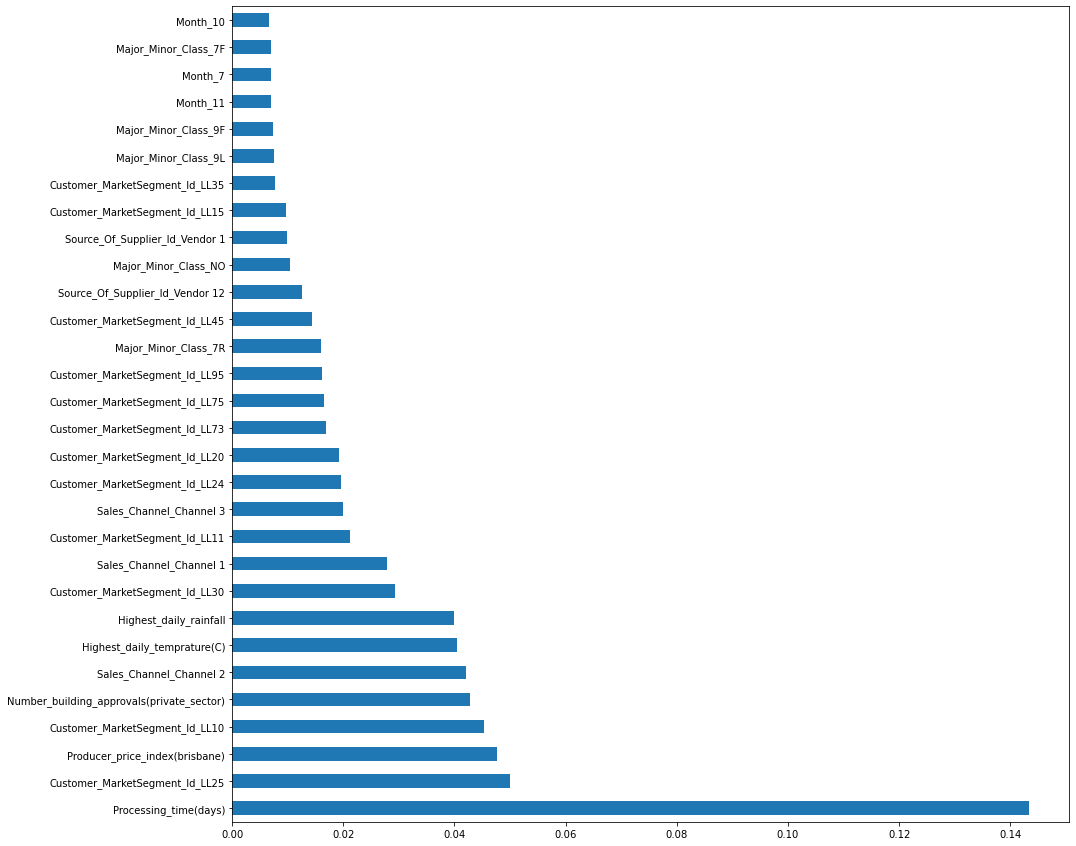

In [62]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(15,15))

<AxesSubplot:>

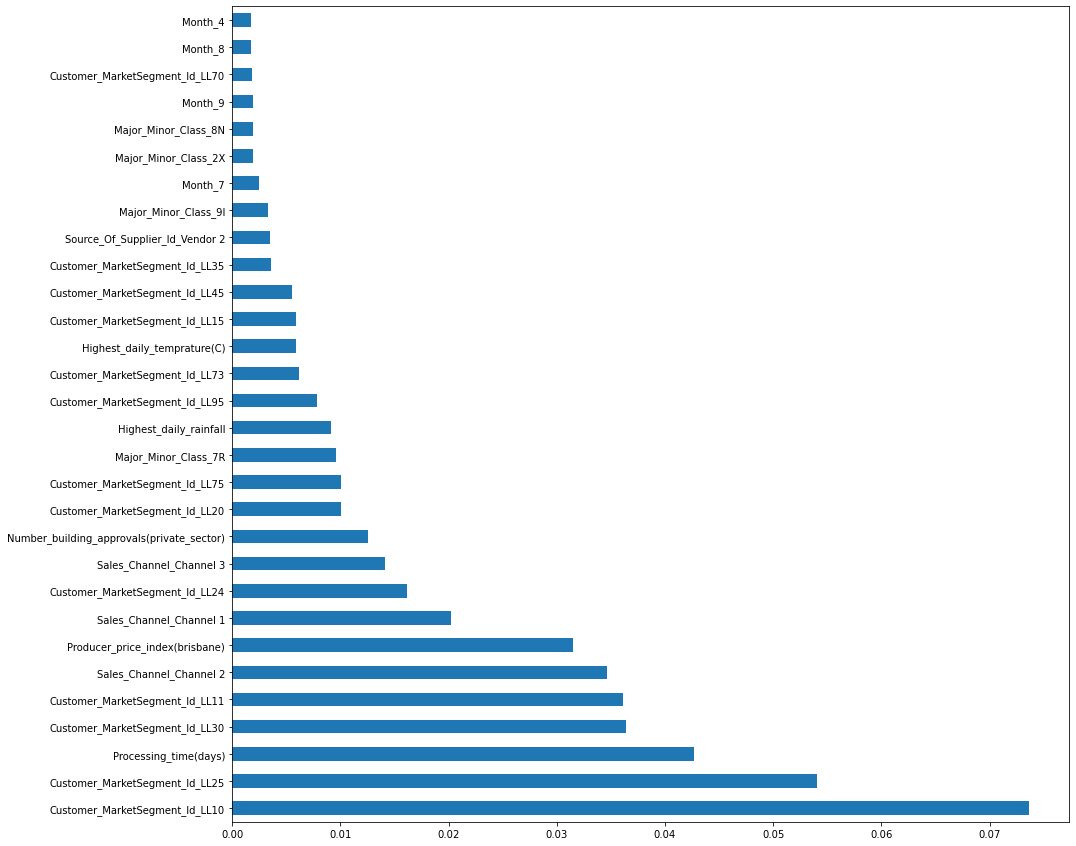

In [65]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test_standard, Y_test, n_repeats=30, random_state=42, n_jobs=-1)
permutation_importances = pd.Series(result.importances_mean, index = X_train.columns)
permutation_importances.nlargest(30).plot(kind='barh', figsize=(15,15))